In [1]:
import tensorflow as tf
import numpy as np
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE=200
EPOCHS=30

In [3]:
inputs = tf.keras.Input(shape=(28,28,1)) 
x = tf.keras.layers.Conv2D(32, (3,3))(inputs)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(32, (3,3))(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)
x = tf.keras.layers.Conv2D(64, (3,3))(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(64, (3,3))(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512)(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(10)(x)
x = tf.keras.layers.Activation('softmax')(x)

In [4]:
model = tf.keras.Model(inputs, x)

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# the same
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#               loss=tf.keras.losses.CategoricalCrossentropy(),
#               metrics=['accuracy'])

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496 

In [7]:
model.optimizer.get_config()

{'name': 'Adam',
 'learning_rate': 0.001,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [8]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [9]:
x_train = x_train[..., tf.newaxis].astype('float32')
x_test = x_test[..., tf.newaxis].astype('float32')
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test)

In [10]:
train_gen = ImageDataGenerator(rescale=1./255,
                               rotation_range=15,
                               width_shift_range=0.2,
                               height_shift_range=0.1,
                               zoom_range=0.1)

In [11]:
training_set = train_gen.flow(x_train,y_train,batch_size=BATCH_SIZE)
test_set = train_gen.flow(x_test,y_test,batch_size=BATCH_SIZE)

In [12]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', # better than val_acc
                                               patience=3, 
                                               mode='auto', # default
                                               verbose=1)

In [13]:
history = model.fit(training_set,
                         steps_per_epoch=len(x_train) // BATCH_SIZE, # 300
                         validation_data=test_set,
                         validation_steps=len(x_test) // BATCH_SIZE, # 50
                         epochs=EPOCHS,
                         callbacks=[es_callback])

Epoch 1/30
300/300 [==============================] - 49s 163ms/step - loss: 0.4559 - accuracy: 0.8527 - val_loss: 0.1247 - val_accuracy: 0.9600
Epoch 2/30
300/300 [==============================] - 49s 164ms/step - loss: 0.1228 - accuracy: 0.9629 - val_loss: 0.0660 - val_accuracy: 0.9792
Epoch 3/30
300/300 [==============================] - 48s 159ms/step - loss: 0.0871 - accuracy: 0.9730 - val_loss: 0.0654 - val_accuracy: 0.9788
Epoch 4/30
300/300 [==============================] - 50s 168ms/step - loss: 0.0717 - accuracy: 0.9782 - val_loss: 0.0564 - val_accuracy: 0.9823
Epoch 5/30
300/300 [==============================] - 46s 152ms/step - loss: 0.0613 - accuracy: 0.9807 - val_loss: 0.0454 - val_accuracy: 0.9853
Epoch 6/30
300/300 [==============================] - 44s 145ms/step - loss: 0.0563 - accuracy: 0.9829 - val_loss: 0.0389 - val_accuracy: 0.9881
Epoch 7/30
300/300 [==============================] - 43s 142ms/step - loss: 0.0487 - accuracy: 0.9850 - val_loss: 0.0404 - val_ac

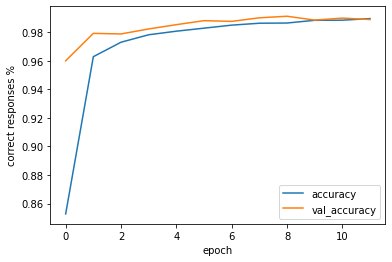

In [14]:
plt.plot(history.history['accuracy'],
         label='accuracy')
plt.plot(history.history['val_accuracy'],
         label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('correct responses %')
plt.legend()
plt.show()

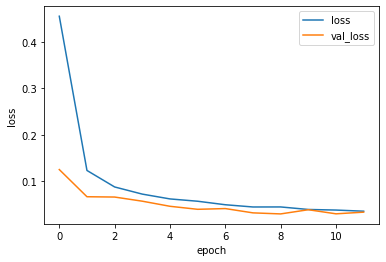

In [15]:
plt.plot(history.history['loss'],
         label='loss')
plt.plot(history.history['val_loss'],
         label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [16]:
model.save('es_func.h5')